In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for data visualiztions

Read the dataset.

In [21]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Get the dimensions of the dataset

In [22]:
df.shape

(303, 14)

Concise summary of the data.

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Find if missing values is present.

In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Replacing missing value using Mean of the column

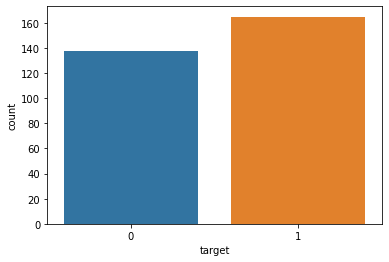

In [25]:
sns.countplot(x="target", data = df)

# Feature Selection

Feature Selection is a techinque of finding out the features that contribute the most to our model i.e. the best predictors.

In [26]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (227, 13) (227,)
Testing set shape:  (76, 13) (76,)


In [28]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(f_classif, k = 6).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [ 9.00849484 31.63833427 54.19054831  3.74833697  0.67179888  1.06896603
  1.01367808 45.99130652 55.56529231 48.79770072 26.10561038 46.02080158
 22.24245359]
Columns:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


We can now confirm our results and use only Petal Length and Petal Width for prediction

# Preprocessing

In [29]:
from sklearn import preprocessing

X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

X_train = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

# KNN

Calculating the accuracy of models with different values of k.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

mean_acc = np.zeros(20)
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.75      , 0.71052632, 0.75      , 0.75      , 0.76315789,
       0.77631579, 0.76315789, 0.78947368, 0.77631579, 0.78947368,
       0.77631579, 0.77631579, 0.77631579, 0.78947368, 0.80263158,
       0.81578947, 0.82894737, 0.81578947, 0.78947368, 0.78947368])

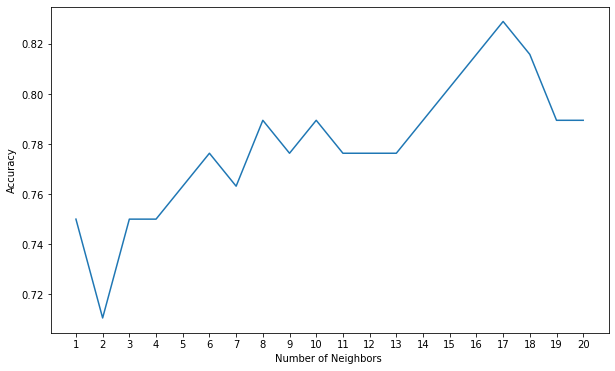

In [31]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

# Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

We will use two hyperparamters- n-neighbors and metric.

1. n_neighbors: Decide the best k based on the values we have computed earlier.
    
2. metric: The distance metric to be used will calculating the similarity.

In [33]:
grid_params = { 'n_neighbors' : [1,5,7,9,11,13,20],
               'metric' : ['minkowski','euclidean','manhattan']}

In [38]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=7, n_jobs = -1)

Since we have provided the 7-fold cross validation( cv= 7), Grid Search will evaluate the model 7x3x3 times with different hyperparameters.

In [39]:
g_res.best_score_

0.8327922077922079

In [40]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 7 folds for each of 21 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    0.1s finished


In [41]:
## get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 20}

# ML Algorithm Comparison

Firstly import the packages to be used.

In [44]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

Prepare the models.

In [45]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 20, metric = 'manhattan')))
models.append(('NB', GaussianNB()))

Evaluate each model in turn and display the results including the mean accuraries and mean standard deviations.

In [48]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.776786 (0.133452)
KNN: 0.778571 (0.142455)
NB: 0.735714 (0.141466)


Display the boxplots for comparison.

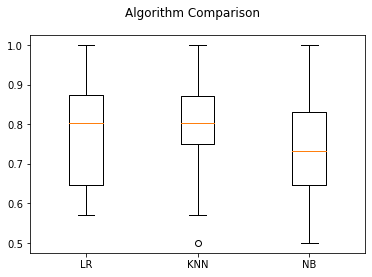

In [49]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()